In [1]:
import pandas as pd

## Данные

Прогнозируйте признак gamma_GTP (фермент (белок) печени и поджелудочной железы). Активность этого фермента в крови повышается при заболеваниях печени и злоупотреблении алкоголем

In [2]:
train = pd.read_csv(r'C:\Users\mescalin\Desktop\API\tabular\train\train (1).csv')
train.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,50,160,70,83.0,0.5,0.2,1.0,1.0,135.0,...,75.0,192.0,17.3,1.0,0.8,25.0,28.0,87.0,2.0,Y
1,Female,50,145,50,69.0,1.2,0.9,1.0,1.0,100.0,...,125.0,103.0,13.1,1.0,0.8,16.0,15.0,14.0,1.0,N
2,Female,50,150,60,81.0,0.8,0.7,1.0,1.0,150.0,...,107.0,138.0,13.9,1.0,0.9,31.0,29.0,213.0,1.0,Y
3,Male,40,170,75,97.0,1.5,1.5,1.0,1.0,119.0,...,123.0,124.0,17.7,1.0,0.7,22.0,46.0,33.0,3.0,N
4,Female,50,160,60,77.0,0.8,0.7,1.0,1.0,103.0,...,154.0,179.0,14.2,1.0,0.8,24.0,27.0,21.0,1.0,Y


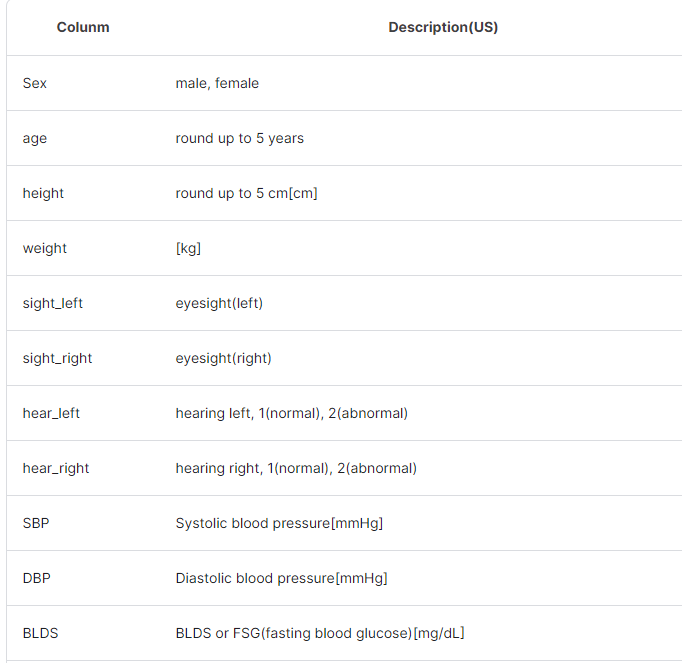

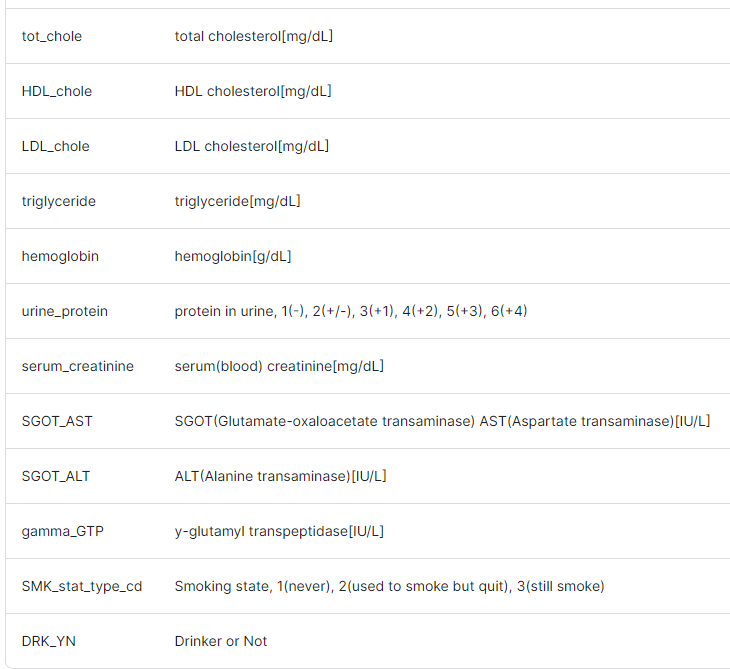

## Задания

In [ ]:
## 1 - обработайте категориальные значения и попробуйте выявить признаки, влияющие на gamma_GTP (группировки, визуализации, корреляция)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               90000 non-null  int64  
 1   age               90000 non-null  int64  
 2   height            90000 non-null  int64  
 3   weight            90000 non-null  int64  
 4   waistline         90000 non-null  float64
 5   sight_left        90000 non-null  float64
 6   sight_right       90000 non-null  float64
 7   hear_left         90000 non-null  float64
 8   hear_right        90000 non-null  float64
 9   SBP               90000 non-null  float64
 10  DBP               90000 non-null  float64
 11  BLDS              90000 non-null  float64
 12  tot_chole         90000 non-null  float64
 13  HDL_chole         90000 non-null  float64
 14  LDL_chole         90000 non-null  float64
 15  triglyceride      90000 non-null  float64
 16  hemoglobin        90000 non-null  float6

In [3]:
train["sex"] = train["sex"].map({'Female': 0, 'Male': 1}).astype(int)

In [4]:
## 2 - выделите признаки(X) и результирующую (Y), разбейте данные на обучающую, валидационную и тестовую выборки

In [5]:
X = train[["SGOT_AST","SGOT_ALT","triglyceride","sex","hemoglobin","weight","waistline","BLDS","DBP","height","SBP"]]
Y = train["gamma_GTP"]

In [6]:
from sklearn.preprocessing import StandardScaler

X.sex = pd.Categorical(X.sex)
X['sex'] = X.sex.cat.codes

C:\Users\mescalin\AppData\Local\Temp\ipykernel_7044\3828367941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.sex = pd.Categorical(X.sex)
C:\Users\mescalin\AppData\Local\Temp\ipykernel_7044\3828367941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X.sex.cat.codes


In [25]:
scaler = StandardScaler().fit(X)
scal_X = scaler.transform(X)
scal_X = pd.DataFrame(scal_X, columns=X.columns)

In [10]:
#разделение выборок
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [ ]:
## 3 - создайте нейронную сеть с помощью Keras c одним скрытым слоем с 50 нейронами (функция активации - relu), метрика - mse
## обучите сеть

In [11]:
from tensorflow import keras #pip install tensorflow
import tensorflow as tf

In [12]:
model = keras.models.Sequential()

In [13]:
X_train.shape[1:]

(11,)

In [14]:
model.add(keras.layers.Dense(50,activation='relu',input_shape=X_train.shape[1:])),
model.add(keras.layers.Dense(1,activation='relu'))

In [15]:
model.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse'])

In [16]:
history = model.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20


1800/1800 [==============================] - 5s 2ms/step - loss: 1684.4871 - mse: 1684.4871 - val_loss: 1640.4398 - val_mse: 1640.4398
Epoch 2/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1616.2690 - mse: 1616.2690 - val_loss: 1597.1838 - val_mse: 1597.1838
Epoch 3/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1603.6222 - mse: 1603.6222 - val_loss: 1593.7078 - val_mse: 1593.7078
Epoch 4/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1589.5260 - mse: 1589.5260 - val_loss: 1577.5033 - val_mse: 1577.5033
Epoch 5/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1582.3730 - mse: 1582.3730 - val_loss: 1608.5609 - val_mse: 1608.5609
Epoch 6/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1575.7189 - mse: 1575.7189 - val_loss: 1561.8193 - val_mse: 1561.8193
Epoch 7/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1566.8325 - mse: 1566.8325 - val_loss: 1583.93

In [ ]:
## 4 - оцените качество модели на тестовой выборке

In [17]:
#предсказание
y_pred = model.predict(X_test)
y_pred[:10]

563/563 [==============================] - 1s 1ms/step


array([[42.893734],
       [28.656271],
       [21.329569],
       [95.78321 ],
       [16.382841],
       [99.618095],
       [34.612827],
       [17.576654],
       [ 6.945485],
       [29.182053]], dtype=float32)

In [ ]:
## 5 - постройте вторую сеть, где будет уже два скрытых слоя - количество нейронов выбираете сами, обучите модель, оцените качество

In [18]:
#разделение выборок
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [19]:
model = keras.models.Sequential()

In [20]:
model.add(keras.layers.Dense(50,activation='relu',input_shape=X_train.shape[1:])),
model.add(keras.layers.Dense(100,activation='relu',input_shape=X_train.shape[1:])),
model.add(keras.layers.Dense(1,activation='relu'))

In [21]:
model.compile(loss="mean_squared_error", optimizer="adam",metrics = ['mse'])

In [22]:
history = model.fit(X_train, y_train,epochs=20, validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
1800/1800 [==============================] - 5s 2ms/step - loss: 1689.6077 - mse: 1689.6077 - val_loss: 1678.0129 - val_mse: 1678.0129
Epoch 2/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1624.5104 - mse: 1624.5104 - val_loss: 1600.6715 - val_mse: 1600.6715
Epoch 3/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1592.3683 - mse: 1592.3683 - val_loss: 1669.6317 - val_mse: 1669.6317
Epoch 4/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1579.3608 - mse: 1579.3608 - val_loss: 1546.2794 - val_mse: 1546.2794
Epoch 5/20
1800/1800 [==============================] - 3s 2ms/step - loss: 1563.2286 - mse: 1563.2286 - val_loss: 1602.6169 - val_mse: 1602.6169
Epoch 6/20
1800/1800 [==============================] - 5s 3ms/step - loss: 1550.7563 - mse: 1550.7563 - val_loss: 1585.7170 - val_mse: 1585.7170
Epoch 7/20
1800/1800 [==============================] - 5s 3ms/step - loss: 1538.3381 - mse: 1538.3381 - val_loss: 1572.5354

In [23]:
#предсказание
y_pred = model.predict(X_test)
y_pred[:10]

563/563 [==============================] - 1s 1ms/step


array([[40.75648 ],
       [26.995193],
       [20.41052 ],
       [88.81614 ],
       [15.985469],
       [93.83799 ],
       [28.683891],
       [16.39348 ],
       [12.23273 ],
       [21.331501]], dtype=float32)

In [ ]:
## 6 - постройте график с тремя линиями (реальные значения, предсказанные с помощью 1 модели, предсказанные с помощью 2 модели)

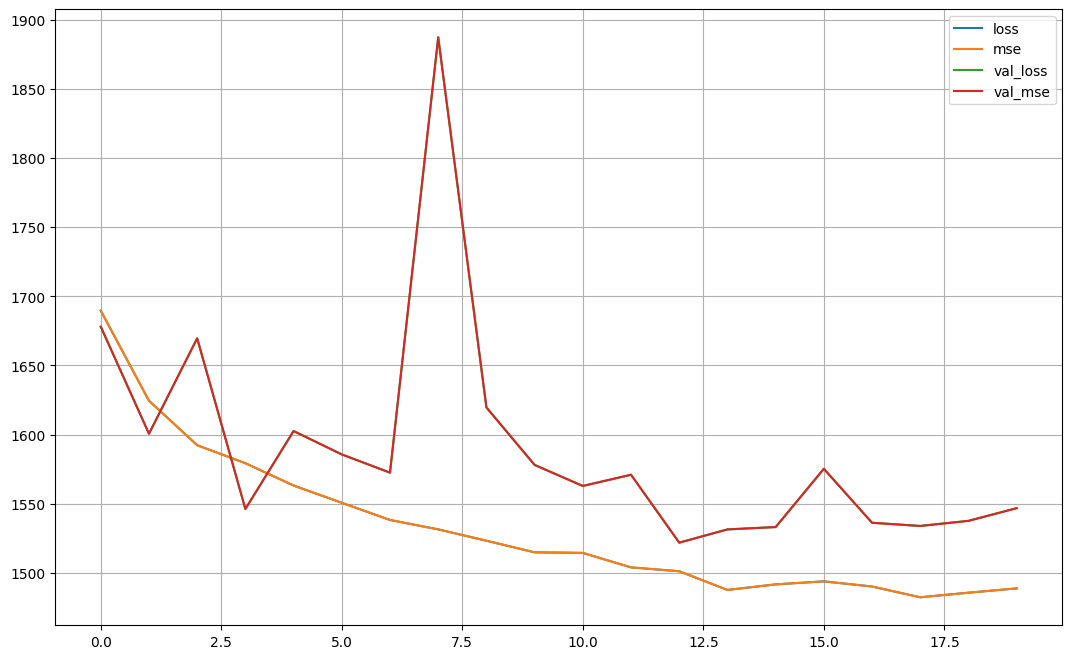

In [24]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

In [26]:
### Сохрание модели StandardScaler
import joblib
joblib.dump(scaler, "scaler.joblib")
#model = joblib.load("scaler.joblib")

['scaler.joblib']

In [28]:
### Сохраняем модель Keras
model.save('my_model.keras')

In [9]:
### названия столбцов
pd.DataFrame(X.columns,columns=['Feature']).to_csv('features.csv',index=False)